# NT4CV Lab Assignment (2025–2026)
### Collaborative Notebook (for GitHub)
This notebook organizes all required questions from the assignment PDF.
Each member can fill in results, figures, explanations, and observations.

---
# Part 1 — Emergency Vehicle Alert (802.11p vs NR-V2X)

## **Q1. 802.11p Version**
**Run:** `v2v-emergencyVehicleAlert-80211p`

- Average latency (ms):
- Average PRR:
- Does the application work properly? (Short explanation)

### Your Answer:


802.11


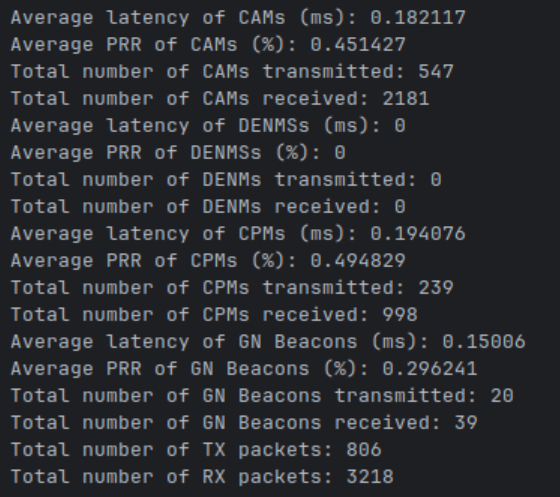

## **Q2. NR-V2X Version**
**Run:** `emergencyVehicleAlert-nrv2x`

- Average latency (ms):
- Average PRR:
- Does the application work properly?

### Your Answer:


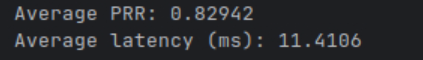

## **Q3. Compare 802.11p & NR-V2X**
Discuss:
- Which technology performs better (latency, PRR)?
- Technical reasoning for the difference.

### Your Answer:


---
# Part 2 — CAM Application (802.11p)

## **Q4. Latency vs Data Rate (3, 6, 9, 12, 24 Mbps)**
**Configuration:**
- `baseline = 100 m`
- `tx-power = 27 dBm`
- Interference disabled

Create a table:

| PHY Mode | Latency (ms) | PRR |
|----------|--------------|-----|
| 3 Mbps   |              |     |
| 6 Mbps   |              |     |
| 9 Mbps   |              |     |
| 12 Mbps  |              |     |
| 24 Mbps  |              |     |

### Interpretation:
- Describe how data rate affects medium occupancy, latency, and PRR.

### Your Answer:


I SET SIM TIME 25 HERE

3BPS 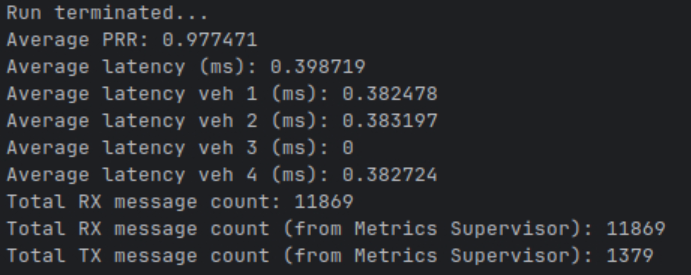

6BPS
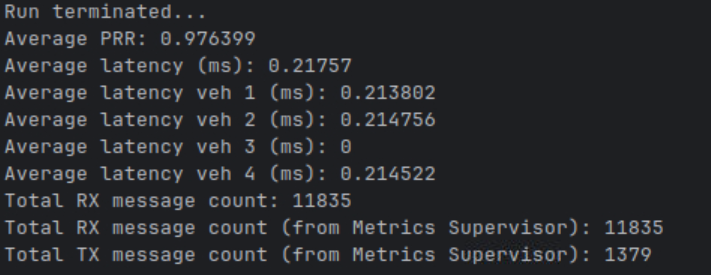

9BPS
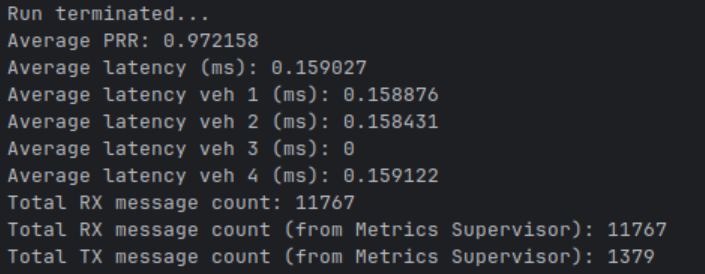

12BPS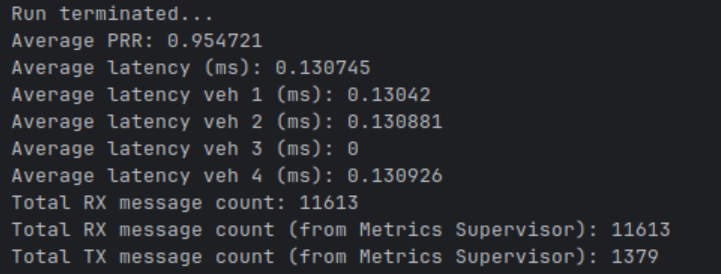

24BPS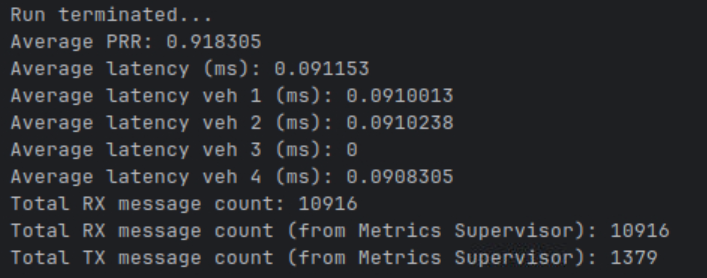

## **Q5. Interferer AC Level**
ac_vo

### Your Answer:
![Screenshot 2025-12-09 191117.png](<attachment:Screenshot 2025-12-09 191117.png>)
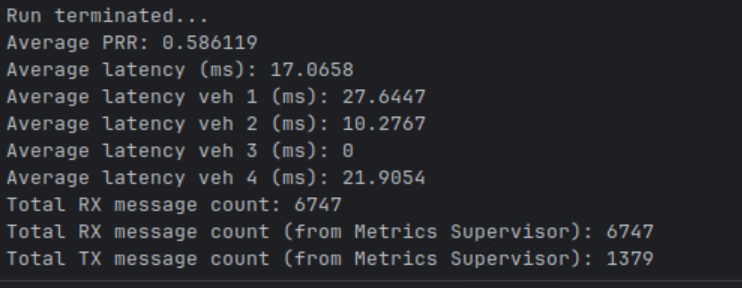

## **Q6 & Q7. PRR & Latency with Different AC Levels**
**Test CAM with these user priorities:**
- AC_BK (UP 1)
- AC_BE (UP 0)
- AC_VI (UP 4)
- AC_VO (UP 6)
- No interference

Fill table:

| AC | UP | Latency (ms) | PRR |
|----|----|--------------|-----|
| BK | 1  |              |     |
| BE | 0  |              |     |
| VI | 4  |              |     |
| VO | 6  |              |     |
| No interference | — |   |     |

### Add two plots (latency vs AC, PRR vs AC)
Upload or embed figures here.

### Interpretation:
- How does AC priority influence channel access (EDCA)?
- Why does VO usually give best latency/PRR?

### Your Answer:


UP0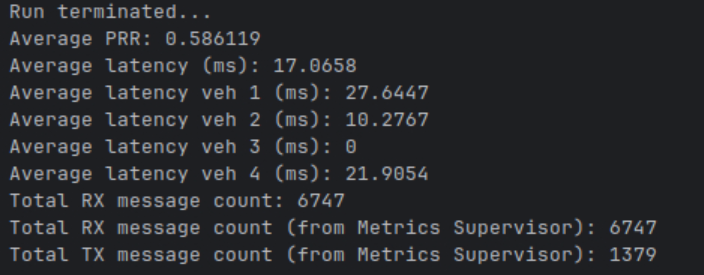

UP1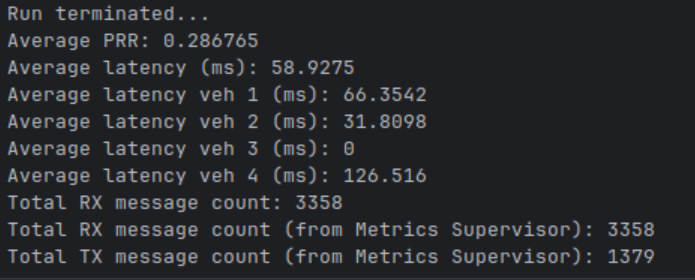

UP2 SAME TO 1

UP3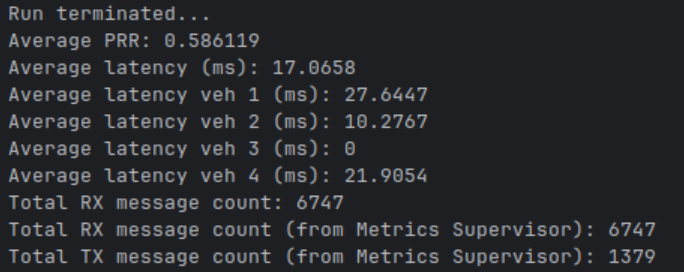

UP4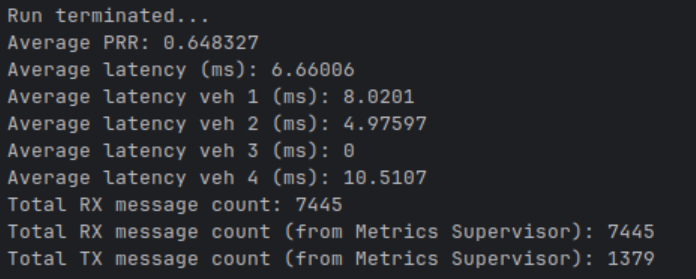

5 SAME TO 4

UP6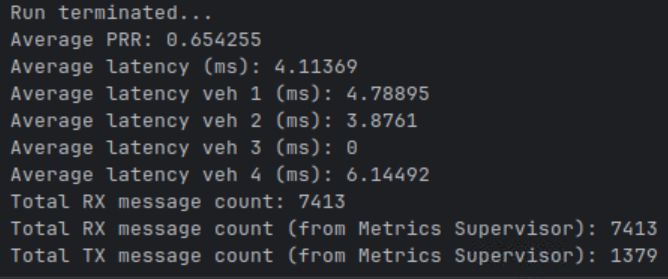

7 SAME TO 6

task2.7 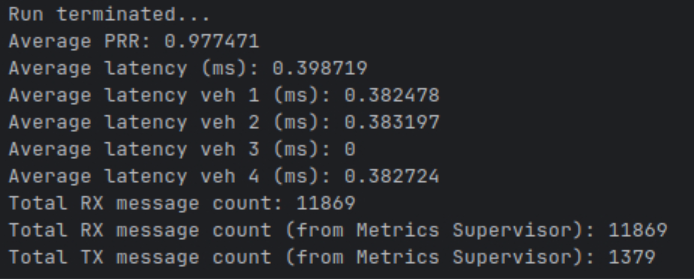

## **Q8. Behavior with No Interference**
Compare BE with/without interference.

### Your Answer:


## **Q9. Effect of Tx Power (18, 30, 33 dBm)**
**Config:**
- AC_BE
- baseline = 100m
- Data rate = 3 Mbps
- Interference disabled

| Tx Power | PRR | Total RX CAMs | Interpretation |
|----------|-----|----------------|----------------|
| 18 dBm   |     |                |                |
| 30 dBm   |     |                |                |
| 33 dBm   |     |                |                |

### Your Answer:


18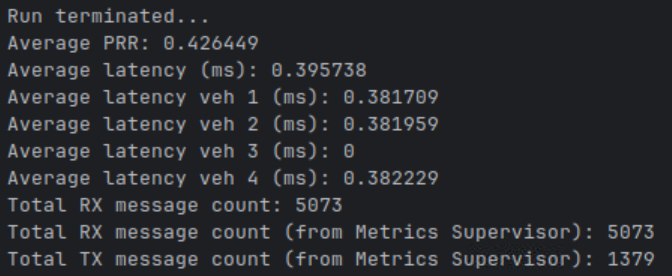

30 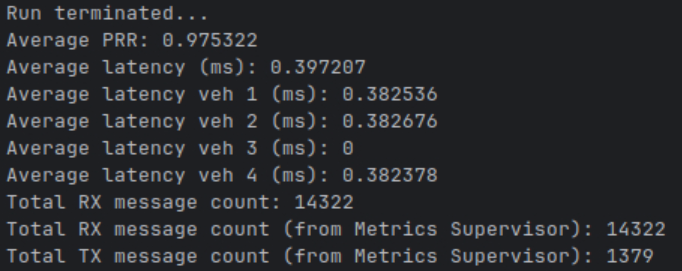

33 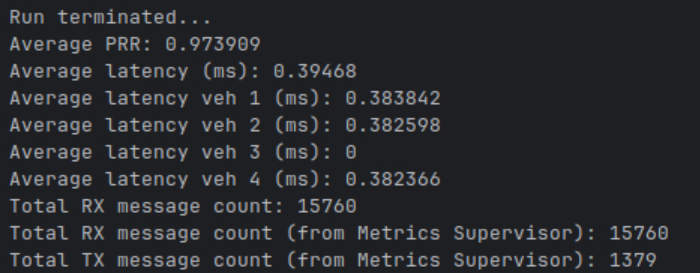

---
# Wireshark Analysis (Q10–Q12)

## **Q10. CAM Message Structure in Wireshark**
Open a CAM packet from vehicle 5.

Answer:
- Protocol version:
- Message ID:
- Station ID field:
- Basic Container content:
  - Position (lat/lon)
  - Heading
  - Speed
  - Station Type

### Your Answer:


open pcap4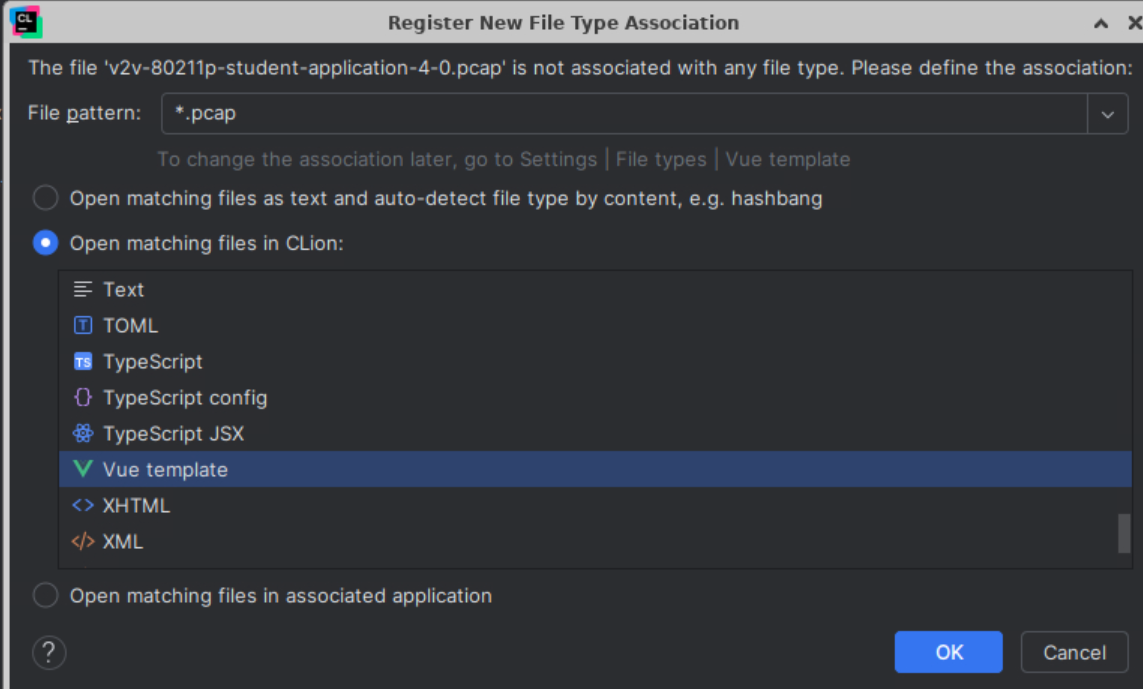

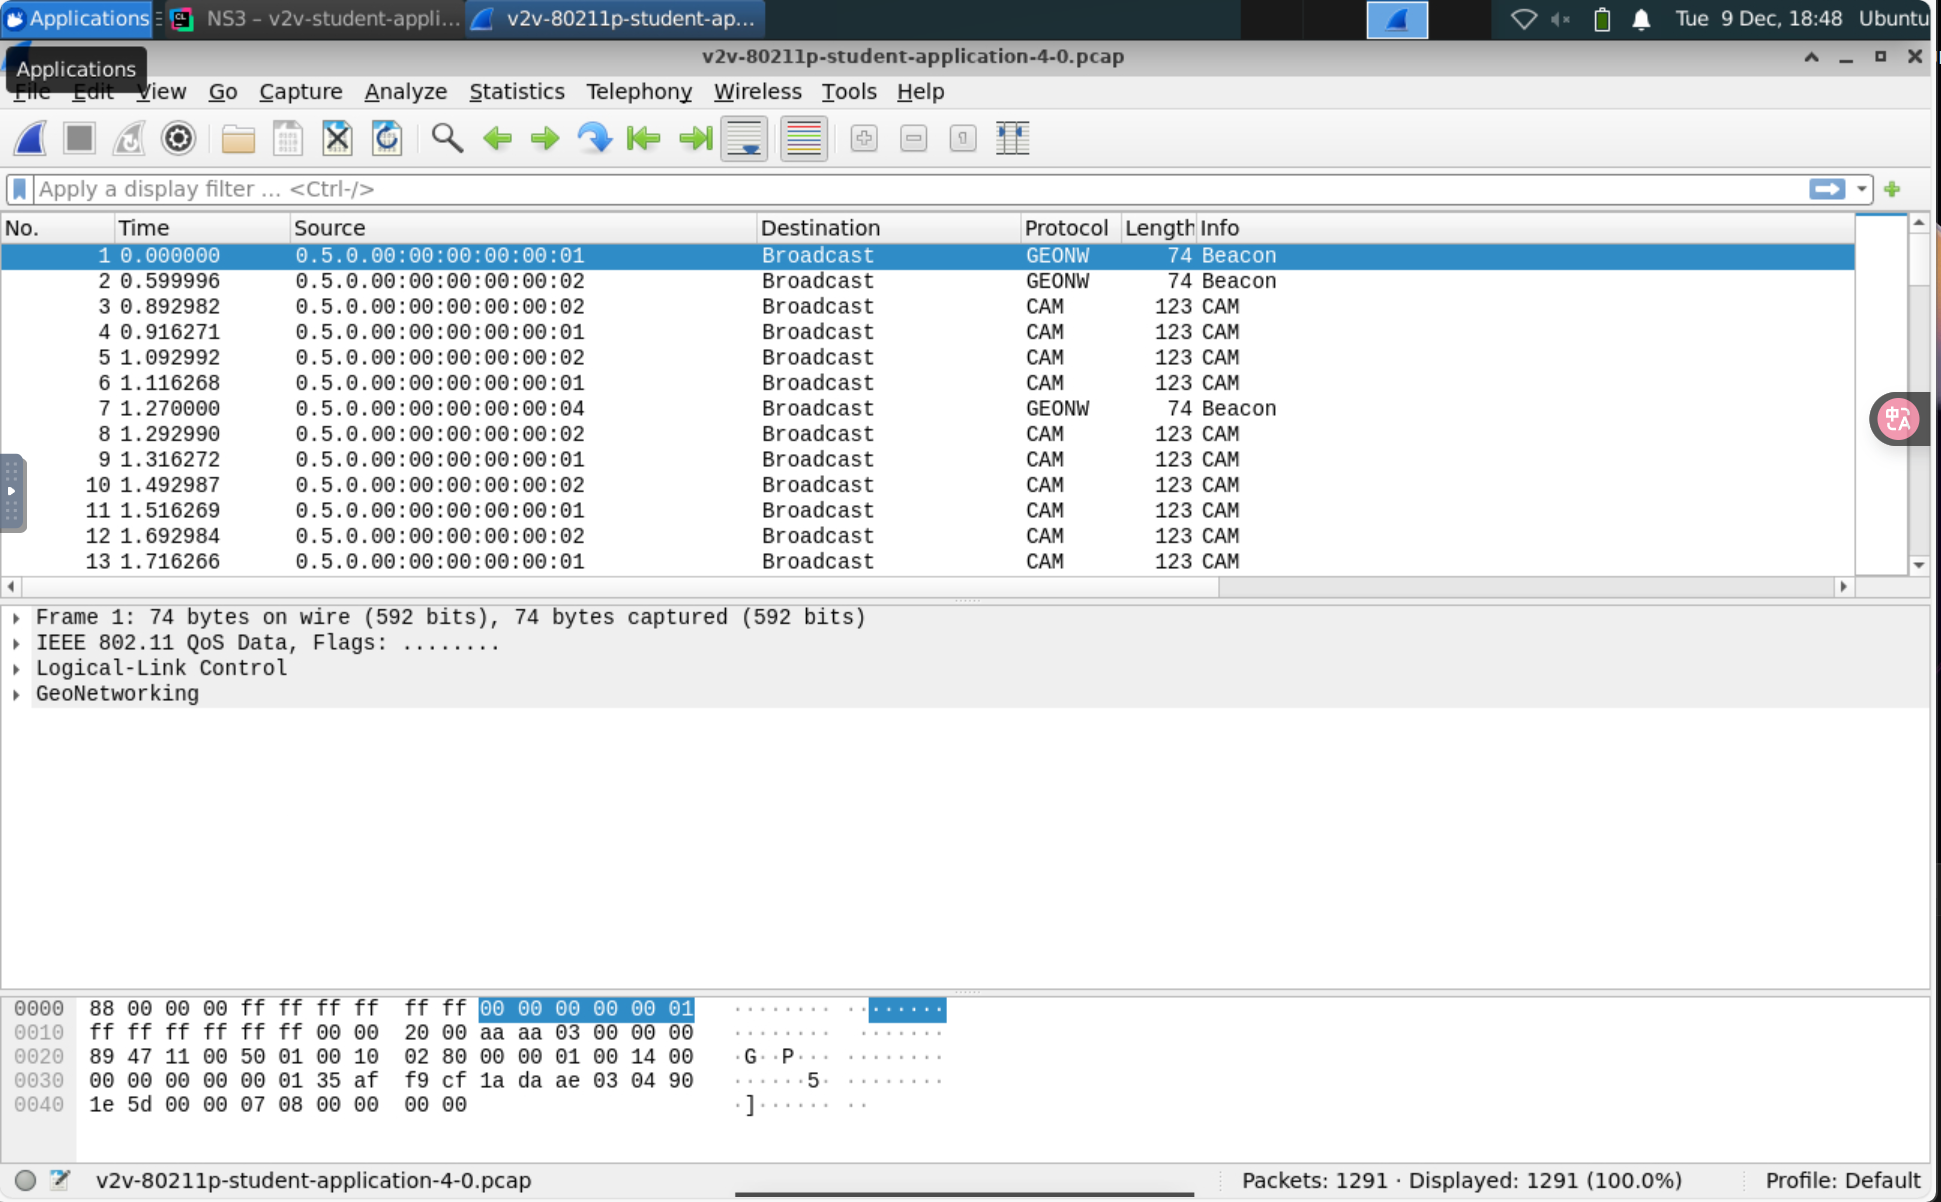

### **1. Message types observed**

By opening the `.pcap` files with Wireshark, we observe the following packet types:

- **GeoNetworking Beacon**
- **CAM (Cooperative Awareness Message)**
- **IEEE 802.11p QoS Data frames**
- **LLC (Logical Link Control)**

Typical sizes observed:

- Beacon frames: **74 bytes**
- CAM frames: **~123 bytes**

These values match ETSI ITS-G5 implementations.

---

### **2. Protocol stack structure**

Expanding a CAM frame in Wireshark reveals the full ETSI communication stack:

1. **IEEE 802.11p MAC Header**
   - Frame type: QoS Data  
   - Destination: Broadcast  
   - Source: MAC address of the transmitting vehicle  

2. **LLC (Logical Link Control)**  
   - Encapsulates the GeoNetworking layer  

3. **GeoNetworking Header**
   - Header type: Beacon or CAM  
   - Contains geographic routing and node position information  

4. **BTP Header (Basic Transport Protocol)**
   - CAMs use BTP-B  
   - Standard destination port: **2001**

5. **CAM Payload**
   - Station ID  
   - Latitude / Longitude  
   - Heading  
   - Speed  
   - Vehicle dynamic information

This layered structure confirms that packets follow the ETSI ITS-G5 protocol stack  
(IEEE 802.11p → LLC → GeoNetworking → BTP → CAM).

---

### **3. Observation on per-vehicle traces**

Each vehicle generates a separate `.pcap` file:

- `v2v-80211p-student-application-1-0.pcap`
- `v2v-80211p-student-application-2-0.pcap`
- …

Inside each file, only:

- Packets **sent by that vehicle**, and  
- Packets **received by that vehicle**

are included.

For example, in node 1’s `.pcap` file:

- All frames listed have the source MAC of the transmitting vehicles  
- Destination is always **Broadcast**, as CAMs are broadcast messages  
- Only frames received by node 1 appear, consistent with ns-3 per-device tracing

This confirms that the trace system isolates packet captures correctly on a per-vehicle basis.

## **Q11. CAM Transmission Rate (I/O Graph)**
- Minimum transmission rate observed:
- Maximum transmission rate observed:
- Compare with ETSI CAM spec (1–10 Hz).

### Your Answer:


## **Q12. Unit Explanation (DE / DF)**
Explain units used:
- `DE_SpeedValue` (0.01 m/s)
- `DE_HeadingValue` (0.1 degree)
- Why DE and DF are different levels in ETSI ITS ASN.1

### Your Answer:


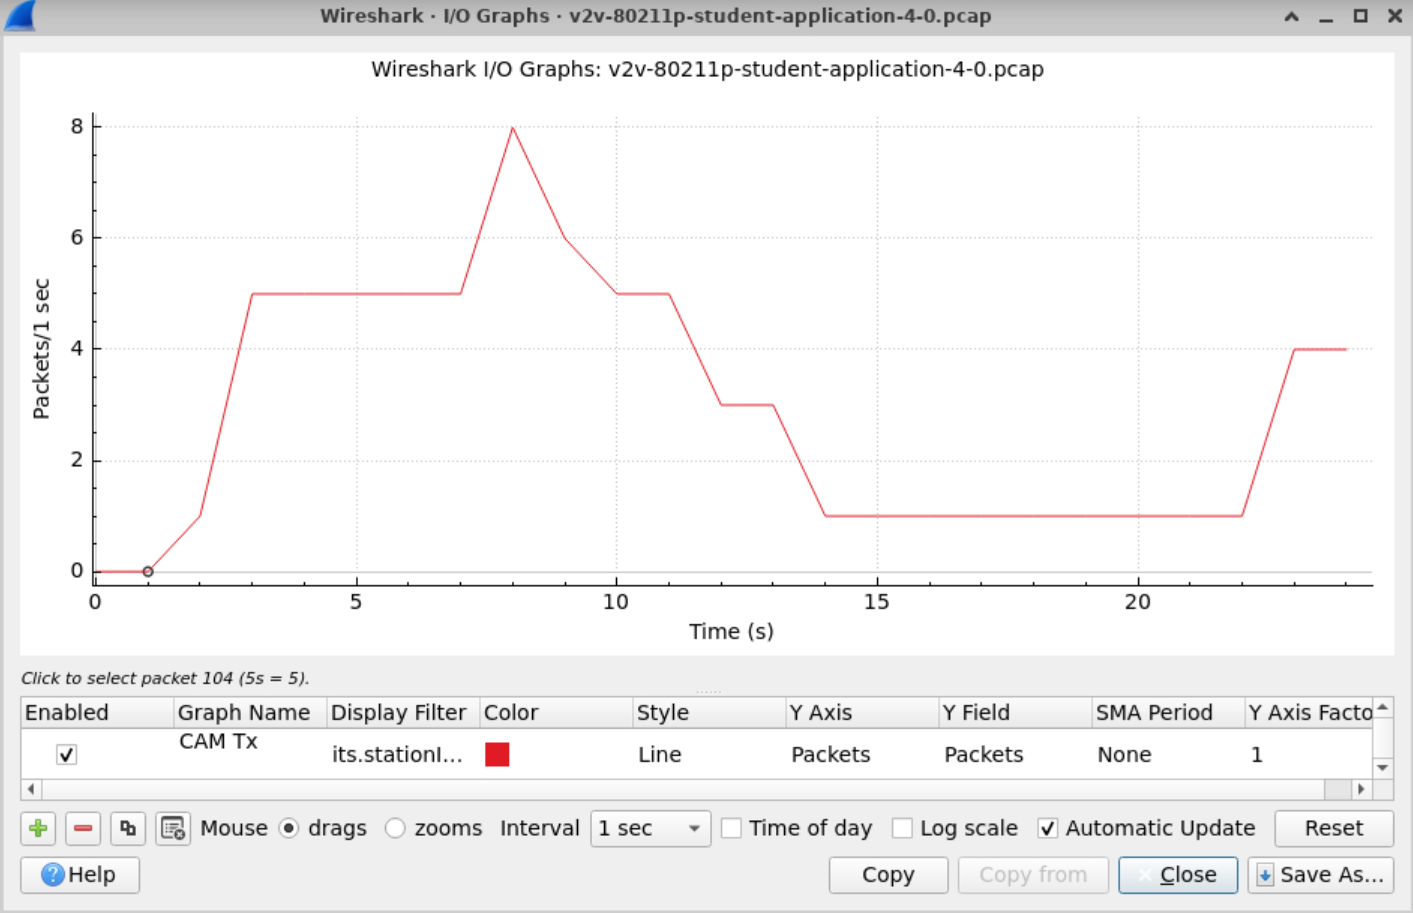

---
# Q13 — RSSI vs Distance Plot

Attach your scatter plot of RSSI vs distance.

### Observations:
- Path loss behavior
- At which distance does reception typically stop?

### Your Answer:


---
# Part 3 — DENM (Icy Road Warning)

## Which vehicles received the DENM?
- List vehicle IDs
- Approximate reception times

### Your Answer:


## Wireshark DENM Inspection
- Protocol version:
- Message ID for DENM:
- Situation container → causeCode, subCauseCode:
- Confirm it encodes “ice on road”.

### Your Answer:


---
# Part 4 — VRU Warning & Speed Reduction

## Q: Demonstrate Speed Reduction Logic
Include:
- Code snippet for `receiveVAM()`
- Code snippet for `restoreSpeed()`
- Explanation of your threshold X, Y, Z

### Your Answer:


## SUMO Screenshot
Upload screenshot of the red (slowed) vehicle.

### Insert Image Here


## Final Statistics
- Total CAMs:
- Total VAMs:
- Average PRR:
- Average latency:

### Interpretation:
Did your safety application behave correctly?
